# <span style="color:navy"> Numerical Simulation Laboratory
# <span style="color:orange"> Numerical Exercises 06
### <span style="color:black"> Ising Model</span>

The *Ising Model* provides a good way to describe the Hamiltonian of a system of spins interating with each other and with an external fields. The Hamiltonian of a 1D system has the form:
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
Where $\mu_B=1$ and $k_B=1$, $J$ is the exchange interaction, $h$ is the external field, $s_i$ are the spins ($\scriptsize{\pm 1}$) and in periodic boundaries condition $s_{N+1} = s_1$.  
To simulate an *Ising* system it is useful to perform a Metropolis simulation; since it is a problem of statistical mechanics and the spins follow a Maxwell-Boltzmann distribution with this algorithm we are able to escape from the difficult calculation of partition function (in 1D it is not so difficult, but increasing the dimension will bring lot of difficulties and even unknown exact calculation for $dim > 2$).

In this exercise the aim was to complete a given code, in ordere to compute significant magnetic and thermodynamical properties of a 1D Ising system in two different ways: using Metropolis algorithm and Gibbs one. 

*Metropolis*  
As said before spins follow a distribution $p(\{ s_i \}) \propto e^{-\beta H}$ so the ratio between the probability of new and old configuration is $\frac{P_{new}}{P_{old}} = e^{-\beta \Delta H}$, with obviously $\Delta H = H_{new} - H_{old}$  
In this system the proposed move is essentially trying to flip one random spin. Naming this selected spin $s_j$ the energy are:  
$H_{old} =  -J\,s_j (s_{j-1} + s_{j+1}) -J\sum_{i=1, i\neq j-1, i\neq j}^N s_i s_{i+1} -h s_j-h\sum_{i=1, i\neq j}^N s_i$  
when flipping $s_j \to-s_j$  
$H_{new} =  -J (-s_j) (s_{j-1} + s_{j+1}) -J\sum_{i=1, i\neq j-1, i\neq j}^N s_i s_{i+1} -h (-s_j)-h\sum_{i=1, i\neq j}^N s_i$  
thus, since the two sums do not change when flipping the spin (they do not depends on $s_j$  
$\Delta H = 2\,J\,s_j ( s_{j-1} + s_{j+1} + h)$

*Gibbs*  
The Gibbs algorithm is a Markov chain sampling method (such as Metropolis) where the sampled value (in this case one spin) is chosen between the possible values it can assume (here is $\scriptsize{\pm 1}$) with probability:
$$p\left(s_k'|\left\{s_j : j\neq k\right\}\right) = \frac {p(s_k')}{p(+1)\,+\,p(-1)}$$
where $p(s_i)$ is the probability of having the spin $s_k'$ in a given configuration of spins. 
Therefore in this case given the configuration of spins, a random spin $s_k'$ is chosen and the probability of $s_k' = 1$ is computed, which results:  
$p\left(1|\left\{s_j : j\neq k\right\}\right) = \frac {p(+1)}{p(+1)\,+\,p(-1)} = \frac{1}{1 + \frac {p(-1)}{p(+1)}}$  
and, using the same results found for Metropolis with $s_j = 1$  
$\frac {p(-1)}{p(+1)} = \exp \left\{-\beta\,2\,J\,( s_{j-1} + s_{j+1} + h)\right\}$
It is possible to demostrate that proposing to move a spin in with this probability as transition probability would produce an always accepted move in Metropolis, thus the Gibbs algorithm converges.  

After implementing the two sampling methods I add the computation of heat capacity per spin ($C(N,T)$), magnetic susceptibilty per spin ($\chi(N,T)$), and magnetization per spin ($M(N,T,h)$) in the following way:  
1. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
2. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
3. $M(N,T)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

*Equilibration*  
Like every Metropolis also Ising Model one should be equilibrated before the start of simulation. For this reason I add the possibility of restarting simulation from the last configuration reached in the previous simulation.  
To understand whether the system is equilibrated or not one should watch some properties and see if they are stable. 
In the following graphs, the values of $U$ and $C$ at $T = 0.5$ and $T = 2.0$ as function of blocks in a simulation of *100* blocks each of *1000* steps. It can be seen that this system reaches the equilibrium is reached in about *40* blocks (i.e. 40000 steps).

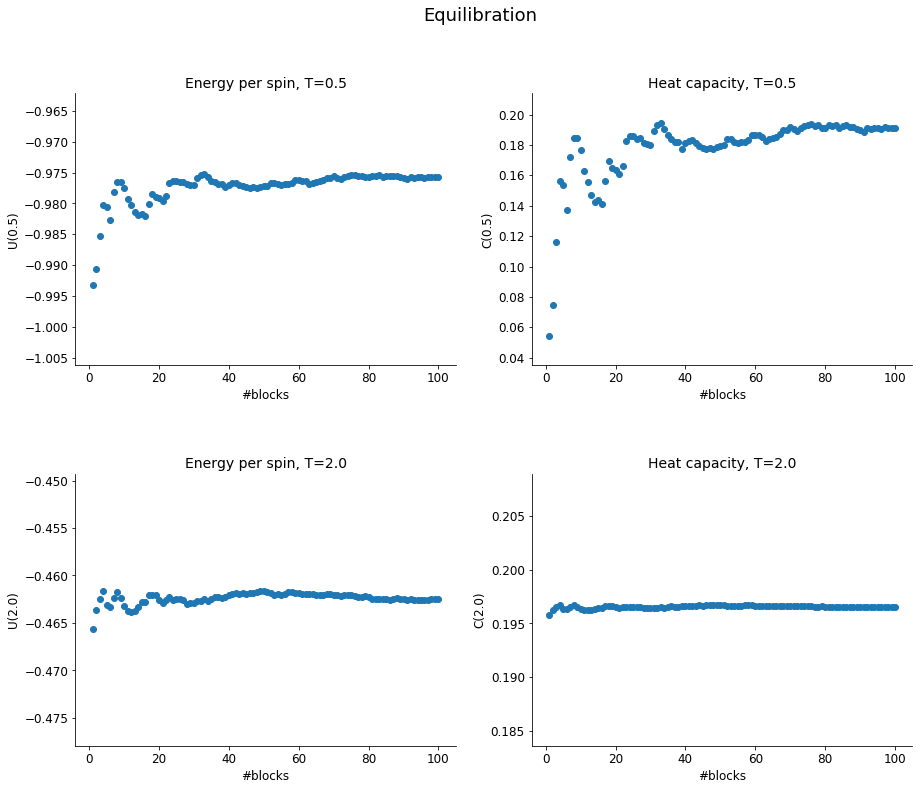

In [1]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

f, axarr = plt.subplots (2,2, figsize=(15,12))
f.suptitle("Equilibration")
#T=0.5
blk, nrg, err = np.loadtxt ("Equilibration/output.ene.T05.dat", usecols=(0, 1, 2), delimiter='\t', unpack= True)
axarr[0,0].scatter(blk, nrg)
axarr[0,0].set_title("Energy per spin, T=0.5")
axarr[0,0].set_xlabel("#blocks")
axarr[0,0].set_ylabel("U(0.5)")

heat, err = np.loadtxt ("Equilibration/output.heat.T05.dat", usecols=(1, 2), delimiter='\t', unpack= True)
axarr[0,1].scatter(blk, heat)
axarr[0,1].set_title("Heat capacity, T=0.5")
axarr[0,1].set_xlabel("#blocks")
axarr[0,1].set_ylabel("C(0.5)")

#T= 2.0
blk, nrg, err = np.loadtxt ("Equilibration/output.ene.T20.dat", usecols=(0, 1, 2), delimiter='\t', unpack= True)
axarr[1,0].scatter(blk, nrg)
axarr[1,0].set_title("Energy per spin, T=2.0")
axarr[1,0].set_xlabel("#blocks")
axarr[1,0].set_ylabel("U(2.0)")

heat, err = np.loadtxt ("Equilibration/output.heat.T20.dat", usecols=(1, 2), delimiter='\t', unpack= True)
axarr[1,1].scatter(blk, heat)
axarr[1,1].set_title("Heat capacity, T=2.0")
axarr[1,1].set_xlabel("#blocks")
axarr[1,1].set_ylabel("C(2.0)")
plt.show()

In order to perform simulation with equilibrated system for every temperature in the following cell a python script saves all the configuration after equilibration in a directory, this way one may start the simulation having the equilibration phase yet done.

In [2]:
%%time
#This cell is commented because configuration after equilibration are already calculated and put in the directory
#To regenerate config just uncomment it and run
#As suggested eqblocks = 40 is a good choice, but one may change it
#Also if one wants to explore the interval [0.5, 2,0] better may change npoints (default = 200)


"""
import subprocess

eqblocks = 40
npoints = 200
temp_array =  np.linspace (0.5,2, num = npoints, endpoint=True)

f= open('input.dat',"r+")
lines = f.readlines()
f.close()
lines[5]= str(1) + "\n"    #metropolis sampling option
k = 0
for temp in temp_array:
    lines[1] = str(temp) + "\n"
    #equilibration
    lines[0] = str(0) + "\n"
    lines[6] = str(eqblocks) + "\n"
    #open "input.dat" file and write new values of mu ad sigma
    f= open('input.dat',"w+")
    for i in range (0, len(lines)):
        f.write(lines[i])
    f.close()
    #run code with mu and sigma values
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
    cmd = "mv config.final Configs/config.final_" + str(k)
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
    cmd = "mv seed.out Seeds/seed.out_" + str(k)
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
    k+=1
    
"""

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


'\nimport subprocess\n\neqblocks = 40\nnpoints = 200\ntemp_array =  np.linspace (0.5,2, num = npoints, endpoint=True)\n\nf= open(\'input.dat\',"r+")\nlines = f.readlines()\nf.close()\nlines[5]= str(1) + "\n"    #metropolis sampling option\nk = 0\nfor temp in temp_array:\n    lines[1] = str(temp) + "\n"\n    #equilibration\n    lines[0] = str(0) + "\n"\n    lines[6] = str(eqblocks) + "\n"\n    #open "input.dat" file and write new values of mu ad sigma\n    f= open(\'input.dat\',"w+")\n    for i in range (0, len(lines)):\n        f.write(lines[i])\n    f.close()\n    #run code with mu and sigma values\n    cmd = "./Monte_Carlo_ISING_1D.exe"\n    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix\n    cmd = "mv config.final Configs/config.final_" + str(k)\n    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix\n    cmd = "mv seed.out Seeds/seed.out_" + str(k)\n    returned_value = subprocess.call(cmd, shell=True)  # returns t

To compute the properties as function of the temperature the following cell has a python script that runs the code with different temperatures, starting from the configuration of equilibrium previously sampled. I explored the range of temperature $\left[0.5, 2.0\right]$ with *200* points, to have a good pace and therfore to have curves as smooth as possible, minding also not to have too much waiting time.  
The simulation are done both with Gibbs and Metropolis sampling, they start from the same configuration beacuse the equilibrium configuration should not depend on which sampling method is being used.  
Since Magnetization requires a different value for the parameter $h$ in respect to the other three properties, the script for Magnetization simulation is in another cell below the following, the way it is realized, anyway, is the same as for $U$, $C$ and $\chi$.

In [3]:
#simulation properties
eqblocks = 40
npoints = 200
nblk = 100

In [4]:
%%time
#with npoints = 200 --> ~3 min
import subprocess

temp_array =  np.linspace (0.5,2, num = npoints, endpoint=True)

f= open('input.dat',"r+")
lines = f.readlines()
f.close()

met_nrg = np.zeros((temp_array.size, 2))
met_heat = np.zeros((temp_array.size, 2))
met_susc = np.zeros((temp_array.size, 2))

k = 0
lines[0]= str(1) + "\n"
lines[6] = str(nblk) + "\n"
lines[4] = str(0.0) + "\n"

lines[5]= str(1) + "\n"    #metropolis sampling option
for temp in temp_array:
#clean eventual output
    cmd = "./clean.sh"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#select new temperature
    lines[1] = str(temp) + "\n"
#open "input.dat" file and write new values of temperature 
    f= open('input.dat',"w+")
    for line in lines:
        f.write(line)
    f.close()
#copy config of equilibration to config.final
    cmd = "cp Configs/config.final_"+ str(k) + " config.final"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#copy seed.out
    cmd = "cp Seeds/seed.out_"+ str(k) + " seed.out"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#run code with temp and starting from equilibrate configuration
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
    met_nrg[k] = np.loadtxt("output.ene.dat", skiprows=nblk-1, usecols=(1,2), delimiter='\t', unpack=True)
    met_heat[k] = np.loadtxt("output.heat.dat", skiprows=nblk-1, usecols=(1,2), delimiter='\t', unpack=True)
    met_susc[k] = np.loadtxt("output.chi.dat", skiprows=nblk-1, usecols=(1,2), delimiter='\t', unpack=True)
    k+=1
    
    
    
gibbs_nrg = np.zeros((temp_array.size, 2))
gibbs_heat = np.zeros((temp_array.size, 2))
gibbs_susc = np.zeros((temp_array.size, 2))

k = 0
lines[5]= str(0) + "\n"    #gibbs sampling option
for temp in temp_array:
#clean eventual output
    cmd = "./clean.sh"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#select new temperature
    lines[1] = str(temp) + "\n"
#open "input.dat" file and write new values of temperature 
    f= open('input.dat',"w+")
    for i in range (0, len(lines)):
        f.write(lines[i])
    f.close()
#copy config of equilibration to config.final
    cmd = "cp Configs/config.final_"+ str(k) + " config.final"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#copy seed.out
    cmd = "cp Seeds/seed.out_"+ str(k) + " seed.out"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#run code with temp and starting from equilibrate configuration
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
    gibbs_nrg[k] = np.loadtxt("output.ene.dat", skiprows=nblk-1, usecols=(1,2), delimiter='\t', unpack=True)
    gibbs_heat[k] = np.loadtxt("output.heat.dat", skiprows=nblk-1, usecols=(1,2), delimiter='\t', unpack=True)
    gibbs_susc[k] = np.loadtxt("output.chi.dat", skiprows=nblk-1, usecols=(1,2), delimiter='\t', unpack=True)
    k+=1

CPU times: user 880 ms, sys: 2.34 s, total: 3.22 s
Wall time: 2min 16s


In [5]:
%%time
#with npoints = 200 --> ~3 min
#before runnig this cell one should "turn on" magnetization measure in the code.
#to do this just uncomment the define at the beginning of the code and compile

lines[4] = str(0.02) + "\n"
met_mag = np.zeros((temp_array.size, 2))
k = 0

lines[0]= str(1) + "\n"
lines[6] = str(nblk) + "\n"

lines[5]= str(1) + "\n"    #metropolis sampling option
for temp in temp_array:
#clean eventual output
    cmd = "./clean.sh"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#select new temperature
    lines[1] = str(temp) + "\n"
#open "input.dat" file and write new values of temperature 
    f= open('input.dat',"w+")
    for i in range (0, len(lines)):
        f.write(lines[i])
    f.close()
#copy config of equilibration to config.final
    cmd = "cp Configs/config.final_"+ str(k) + " config.final"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#copy seed.out
    cmd = "cp Seeds/seed.out_"+ str(k) + " seed.out"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#run code with temp and starting from equilibrate configuration
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
    met_mag[k] = np.loadtxt("output.mag.dat", skiprows=nblk-1, usecols=(1,2), delimiter='\t', unpack=True)
    k+=1
    
    
    
gibbs_mag = np.zeros((temp_array.size, 2))
k = 0

lines[5]= str(0) + "\n"    #gibbs sampling option
for temp in temp_array:
#clean eventual output
    cmd = "./clean.sh"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#select new temperature
    lines[1] = str(temp) + "\n"
#open "input.dat" file and write new values of temperature 
    f= open('input.dat',"w+")
    for i in range (0, len(lines)):
        f.write(lines[i])
    f.close()
#copy config of equilibration to config.final
    cmd = "cp Configs/config.final_"+ str(k) + " config.final"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#copy seed.out
    cmd = "cp Seeds/seed.out_"+ str(k) + " seed.out"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
#run code with temp and starting from equilibrate configuration
    cmd = "./Monte_Carlo_ISING_1D.exe"
    returned_value = subprocess.call(cmd, shell=True)  # returns the exit code in unix
    gibbs_mag[k] = np.loadtxt("output.mag.dat", skiprows=nblk-1, usecols=(1,2), delimiter='\t', unpack=True)
    k+=1

CPU times: user 612 ms, sys: 2.49 s, total: 3.11 s
Wall time: 2min 20s


The followign pictures show average values for $U(N, T)$, $C(N, T)$, $M(N, T)$ and $\chi(N, T)$, each with its statistical uncertainty and compared to the analitic value. The values are all in great agreeement with theoretical ones, except for heat capacity that has a slight difference at low temperatures.

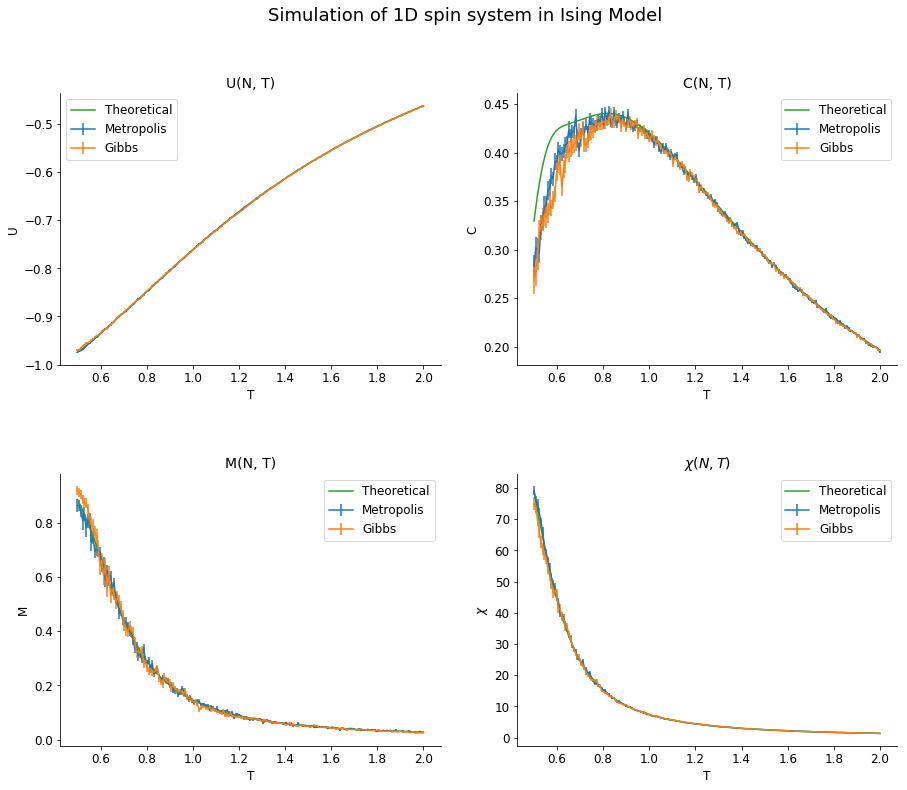

In [6]:
f, axarr = plt.subplots (2,2, figsize=(15,12))
f.suptitle("Simulation of 1D spin system in Ising Model")

T = temp_array
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

#energy
axarr[0,0].errorbar(temp_array, met_nrg.T[0], yerr=met_nrg.T[1], label= "Metropolis")
axarr[0,0].errorbar(temp_array, gibbs_nrg.T[0], yerr=gibbs_nrg.T[1], label= "Gibbs")
axarr[0,0].plot(temp_array, e, label="Theoretical")

axarr[0,0].set_title("U(N, T)")
axarr[0,0].set_xlabel("T")
axarr[0,0].set_ylabel("U")
axarr[0,0].legend()

#heat capacity

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

axarr[0,1].errorbar(temp_array, met_heat.T[0], yerr=met_heat.T[1], label= "Metropolis")
axarr[0,1].errorbar(temp_array, gibbs_heat.T[0], yerr=gibbs_heat.T[1], label= "Gibbs")
axarr[0,1].plot(temp_array, heat, label="Theoretical")

axarr[0,1].set_title("C(N, T)")
axarr[0,1].set_xlabel("T")
axarr[0,1].set_ylabel("C")
axarr[0,1].legend()

#magnetization
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


axarr[1,0].errorbar(temp_array, met_mag.T[0], yerr=met_mag.T[1], label= "Metropolis")
axarr[1,0].errorbar(temp_array, gibbs_mag.T[0], yerr=gibbs_mag.T[1], label= "Gibbs")
axarr[1,0].plot(temp_array, M, label="Theoretical")

axarr[1,0].set_title("M(N, T)")
axarr[1,0].set_xlabel("T")
axarr[1,0].set_ylabel("M")
axarr[1,0].legend()

#susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

axarr[1,1].errorbar(temp_array, met_susc.T[0], yerr=met_susc.T[1], label= "Metropolis")
axarr[1,1].errorbar(temp_array, gibbs_susc.T[0], yerr=gibbs_susc.T[1], label= "Gibbs")
axarr[1,1].plot(temp_array, X, label="Theoretical")

axarr[1,1].set_title(r"$\chi(N, T)$")
axarr[1,1].set_xlabel("T")
axarr[1,1].set_ylabel(r"$\chi$")
axarr[1,1].legend()
plt.show()